#Introduction to Pixels and Point Transformations

Richell Flores

# Objectives

By the end of this notebook, students are expected to

- open images using the Pillow package
- rotate, add, and subtract images
- perform basic point processing techniques

# Main references

https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

Course notebook from Guadalupe, 2024

# Required Packages

For this course, our bread-and-butter in opening images is PIL (Python Imaging Library), with its more recent version Pillow.

If you are working locally, make sure to install these in an environment. See [this website](https://docs.python.org/3/library/venv.html) on how to install an environment.

In [ ]:
!pip install Pillow

In [ ]:
from PIL import Image, ImageChops, ImageOps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import interact

In [ ]:
%matplotlib inline

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


NOTE: Replace the links for the sample images as needed.

# Pixel Representation of Images

Let's consider the following $8\times8$ image.

pixil-frame-0.png

In [ ]:
im  = Image.open('/content/drive/MyDrive/Masters/Math 282.1 - Computer Vision/samples/sample0.bmp')
im

Let's determine some information about this image.

In [ ]:
print(im.format, im.size, im.mode)

BMP (8, 8) 1


Read more on possible modes here: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

Q: Where is the center of this image?

In [ ]:
## insert your code here
print(int(np.floor(im.size[0]/2)), int(np.floor(im.size[1]/2)))

4 4


Transform the image into a matrix.

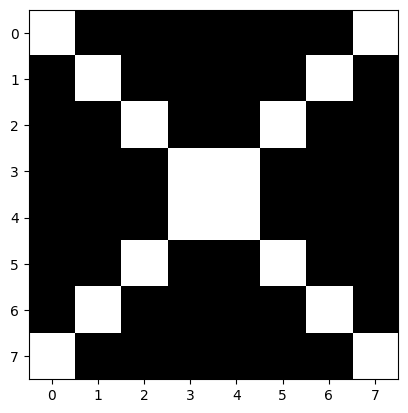

In [ ]:
I = np.asarray(im, dtype='uint8')
plt.imshow(I, cmap='gray')

In [ ]:
I

array([[1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

We locate the indices shere the highest intensities are.

In [ ]:
indices = np.argwhere(I == np.max(I))
print(indices)

[[0 0]
 [0 7]
 [1 1]
 [1 6]
 [2 2]
 [2 5]
 [3 3]
 [3 4]
 [4 3]
 [4 4]
 [5 2]
 [5 5]
 [6 1]
 [6 6]
 [7 0]
 [7 7]]


Suppose we want to rotate the image by 45 degrees counterclockwise. Can you draw (on paper) what image you expect to see?

interactive(children=(IntSlider(value=180, description='angle', max=360), Output()), _dom_classes=('widget-int…

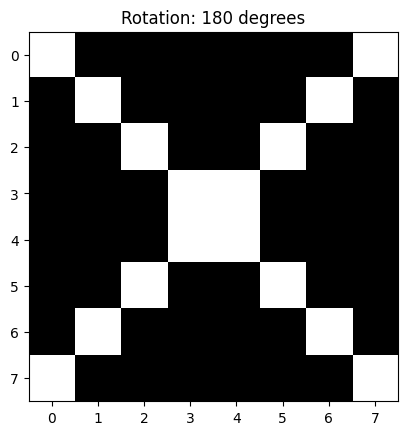

In [ ]:
@interact(angle=(0, 360, 1))
def rotate(angle):
    rotated = im.rotate(angle)
    I = np.asarray(rotated, dtype='uint8')
    plt.title(f"Rotation: {angle} degrees")
    plt.imshow(I, cmap='gray')

## Image operations

### Image addition

In [ ]:
rot_45 = im.rotate(45)
I_r = np.asarray(rot_45, dtype='uint8')

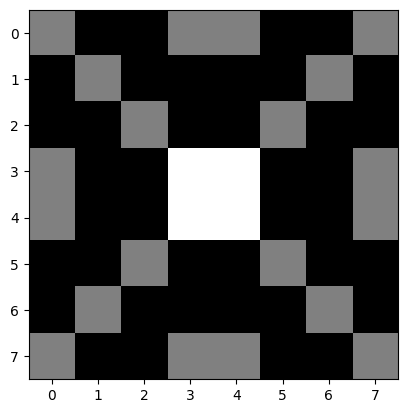

In [ ]:
plt.imshow(I+I_r, cmap='gray')

Using PIL's `ImageChops`, the inputs are the images themselves.

In [ ]:
imagechops = ImageChops.add(im, rot_45)
imagechops

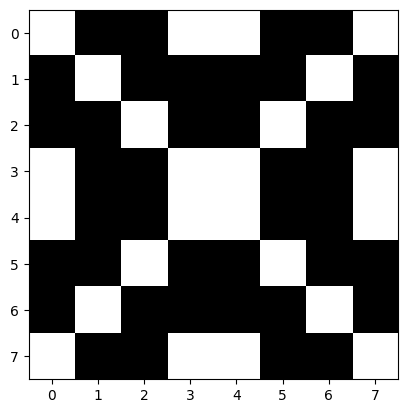

In [ ]:
I_c = np.asarray(imagechops, dtype='uint8')
plt.imshow(I_c, cmap='gray')

### Image subtraction

In [ ]:
image_sub = ImageChops.subtract(im, rot_45)
image_sub

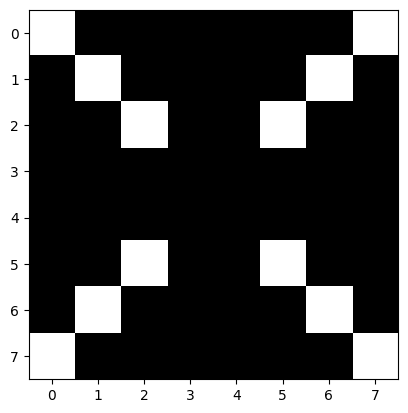

In [ ]:
I_s = np.asarray(image_sub, dtype='uint8')
plt.imshow(I_s, cmap='gray')

In [ ]:
I_s

array([[1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

## Exercise

Find all groups of angles in (1 degree increments) whose resulting image under rotation is identical.

In [ ]:
#write your code here

#Change the image format into numpy array form then compare

groups_of_angles = []

for i in range(1, 361):
  rot_1 = im.rotate(i-1)
  I_r1 = np.asarray(rot_1, dtype = "uint8")
  rot_2 = im.rotate(i)
  I_r2 = np.asarray(rot_2, dtype = "uint8")
  if (I_r1 == I_r2).all():
    groups_of_angles.append((i-1, i))

print(groups_of_angles)


[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (9, 10), (11, 12), (13, 14), (17, 18), (18, 19), (19, 20), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (29, 30), (30, 31), (31, 32), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (41, 42), (43, 44), (44, 45), (45, 46), (46, 47), (48, 49), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (58, 59), (59, 60), (60, 61), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (70, 71), (71, 72), (72, 73), (76, 77), (78, 79), (80, 81), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (99, 100), (101, 102), (103, 104), (107, 108), (108, 109), (109, 110), (111, 112), (112, 113), (113, 114), (114, 115), (115, 116), (119, 120), (120, 121), (121, 122), (123, 124), (124, 125), (125, 126), (126, 127), (127, 128), (128, 129), (129, 130), (131, 132), (133, 134), (134, 135), (135, 136), (136, 137), (138, 139), (

# Intensity Transformations

Let's now consider a new test image to better illustrate the internsity transformations that we will do.

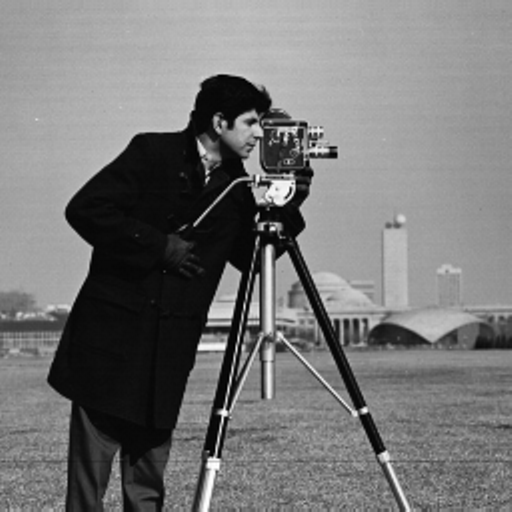

In [ ]:
pg = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/cameraman.tif')
pg

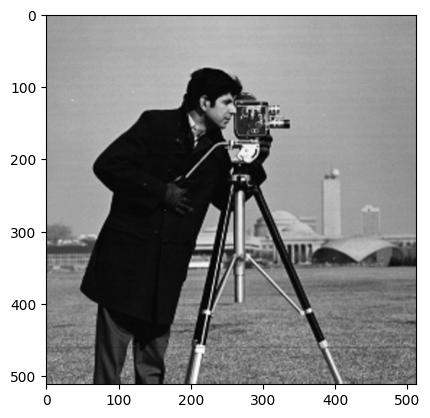

In [ ]:
pg_array = np.asarray(pg, dtype='int32')
plt.imshow(pg_array, cmap='gray')

For most of these methods, we present two ways of doing the intensity transformation: by using native Pillow functions (if available) and by transforming the image into a numpy array.

## Basic point processing techniques

### Image negation

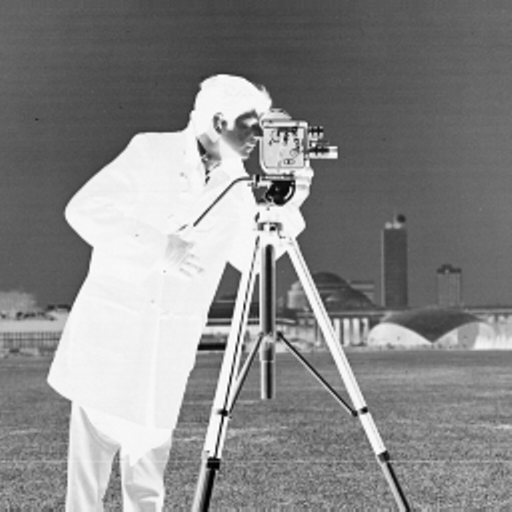

In [ ]:
negated = ImageOps.invert(pg)
negated

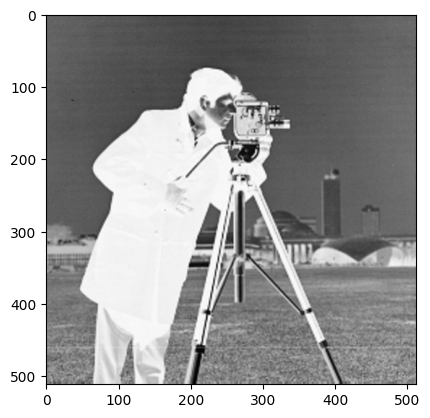

In [ ]:
plt.imshow(~pg_array, cmap='gray')

What are the aspects of the image that was highlighted by inverting it?

In [ ]:
pg_array

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=int32)

In [ ]:
~pg_array

array([[-157, -158, -161, ..., -153, -153, -153],
       [-157, -158, -160, ..., -153, -153, -153],
       [-159, -158, -157, ..., -153, -153, -153],
       ...,
       [-122, -124, -127, ..., -122, -114, -112],
       [-122, -124, -127, ..., -122, -114, -112],
       [-122, -124, -127, ..., -122, -114, -112]], dtype=int32)

In [ ]:
negated_array = np.asarray(negated, dtype='int32')
negated_array

array([[ 99,  98,  95, ..., 103, 103, 103],
       [ 99,  98,  96, ..., 103, 103, 103],
       [ 97,  98,  99, ..., 103, 103, 103],
       ...,
       [134, 132, 129, ..., 134, 142, 144],
       [134, 132, 129, ..., 134, 142, 144],
       [134, 132, 129, ..., 134, 142, 144]], dtype=int32)

Compare the matrices given by the two methods. Can you reason out why the output image is still the same?

### Thresholding

Pillow doesn't have a straightforward way to threshold an image as it is defined in Gonzales. So we use the general point operator instead.

To review what `lambda` does: https://www.freecodecamp.org/news/python-lambda-function-explained

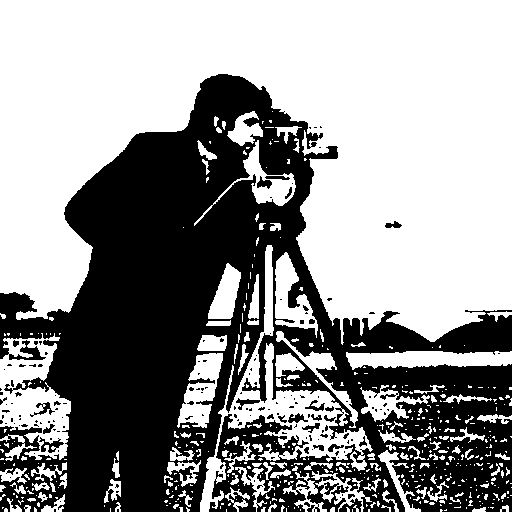

In [ ]:
threshold_value = 128  # Set the threshold value (0-255)
thresholded_image = pg.point(lambda p: 255 if p > threshold_value else 0)
thresholded_image

interactive(children=(IntSlider(value=127, description='threshold', max=255), Output()), _dom_classes=('widget…

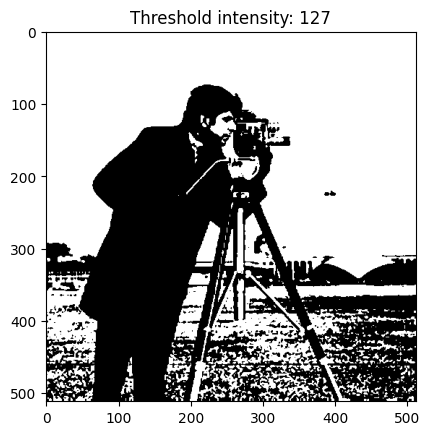

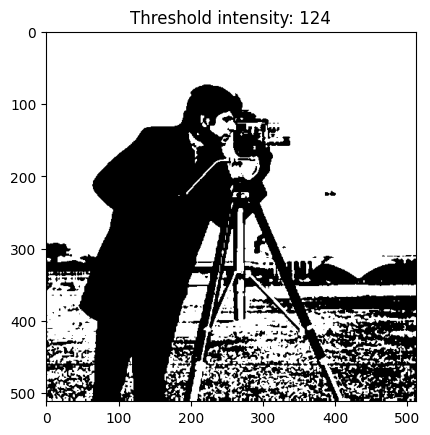

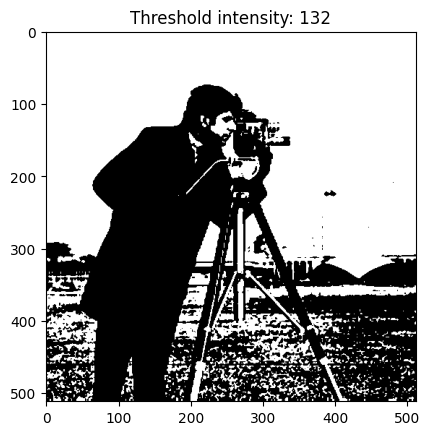

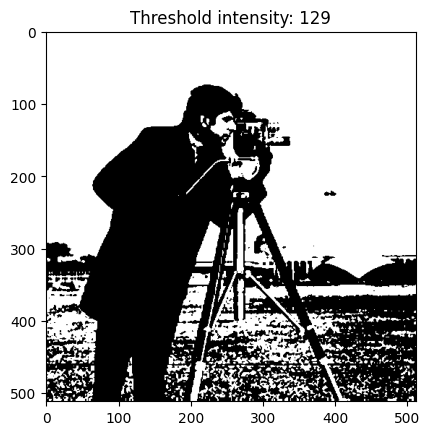

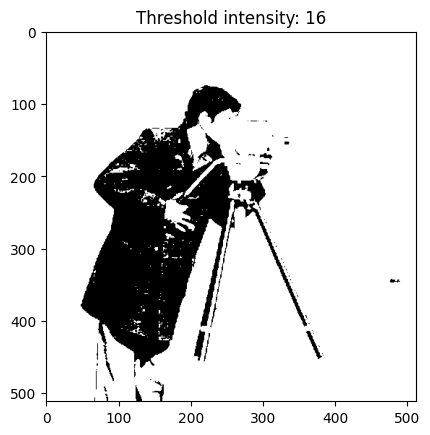

In [ ]:
@interact(threshold=(0,255,1))
def threshold_transform(threshold=127):
    plt.title(f"Threshold intensity: {threshold}")
    plt.imshow(255 * (pg_array > threshold), cmap='gray')

### Log transformation

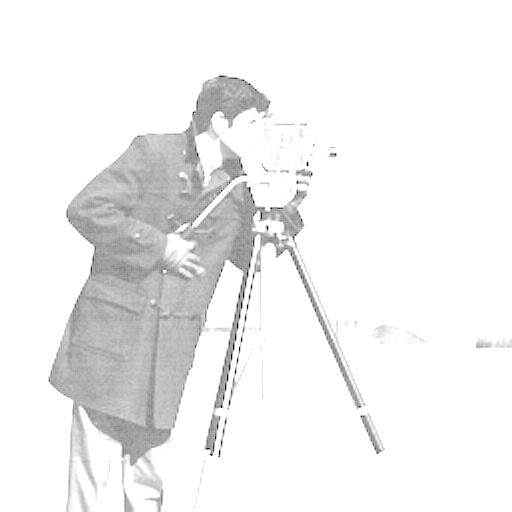

In [ ]:
c = 70  # Set the scaling factor
pg_log = pg.point(lambda p: int(c * np.log1p(p)))
pg_log

array([[51, 51, 51, ..., 50, 50, 50],
       [51, 51, 51, ..., 50, 50, 50],
       [51, 51, 51, ..., 50, 50, 50],
       ...,
       [48, 48, 48, ..., 48, 47, 47],
       [48, 48, 48, ..., 48, 47, 47],
       [48, 48, 48, ..., 48, 47, 47]], dtype=uint8)
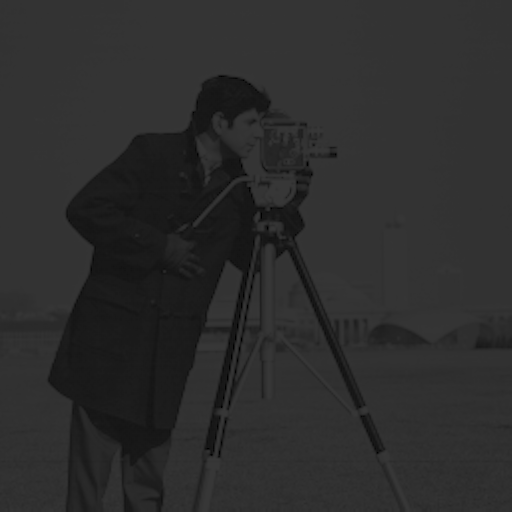

In [ ]:
pg_log_array = np.asarray(pg_log)
pg_log_array

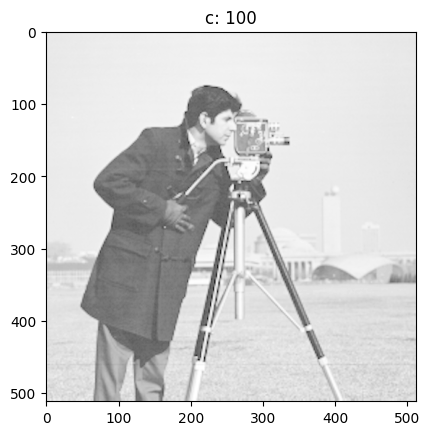

In [ ]:
c = 100
R = c*np.log1p(pg_array)
plt.title(f"c: {c}")
plt.imshow(R, cmap='gray')

In [ ]:
R

array([[5.05624581, 5.06259503, 5.08140436, ..., 5.03043792, 5.03043792,
        5.03043792],
       [5.05624581, 5.06259503, 5.07517382, ..., 5.03043792, 5.03043792,
        5.03043792],
       [5.0689042 , 5.06259503, 5.05624581, ..., 5.03043792, 5.03043792,
        5.03043792],
       ...,
       [4.80402104, 4.82028157, 4.84418709, ..., 4.80402104, 4.73619845,
        4.71849887],
       [4.80402104, 4.82028157, 4.84418709, ..., 4.80402104, 4.73619845,
        4.71849887],
       [4.80402104, 4.82028157, 4.84418709, ..., 4.80402104, 4.73619845,
        4.71849887]])

interactive(children=(FloatSlider(value=1.0, description='c', max=10.0, step=0.01), Output()), _dom_classes=('…

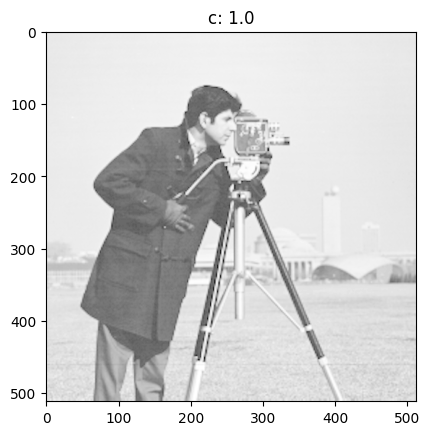

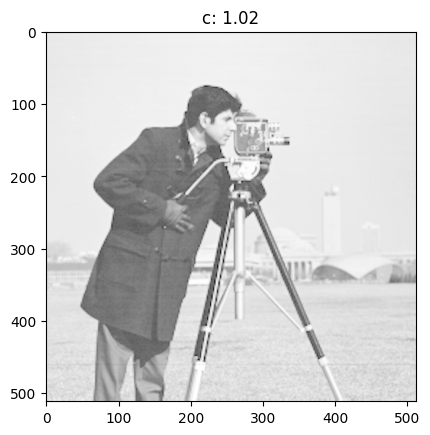

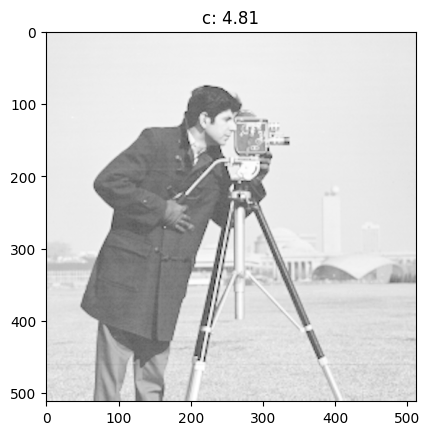

In [ ]:
@interact(c=(0, 10, 0.01))
def log_transform(c=1):
    R = c*np.log1p(pg_array)
    plt.title(f"c: {c}")
    plt.imshow(R, cmap='gray')

Is the log transform appropriate for our test image? Why does it seem that the images produced by the numpy version look the same?

### Power-law transformation

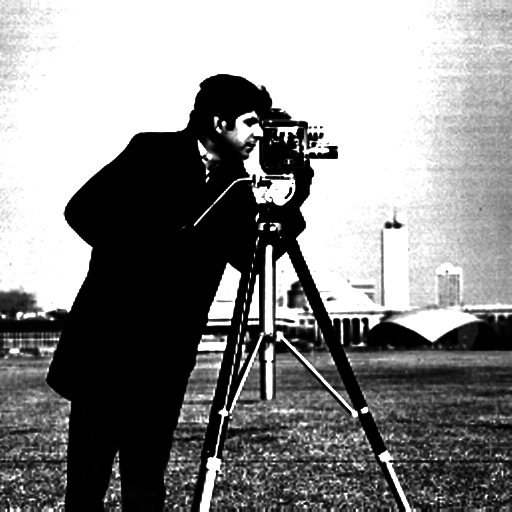

In [ ]:
c = 10
gamma = 5
pg_pl = pg.point(lambda p: int(c * (p / 255.0) ** gamma * 255))
pg_pl

interactive(children=(FloatSlider(value=1.0, description='c', max=10.0, step=0.01), FloatSlider(value=1.0, des…

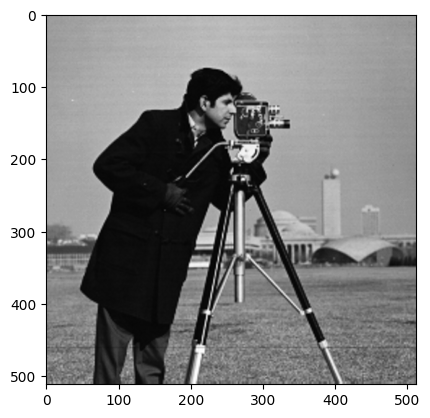

In [ ]:
@interact(c=(0, 10, 0.01), gamma=(0, 3, 0.01))
def powerlaw_transform(c=1, gamma=1):
    R = c * pg_array**gamma
    plt.imshow(R, cmap='gray')

## Exercises

Let's try to implement some of the examples in the book on our own.

### Fourier spectrum

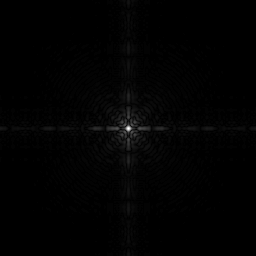

In [ ]:
dft = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/dft.tif')
dft

Apply the appropriate transformation to enhance the details of the image.

In [ ]:
# insert your code here

### Fracture

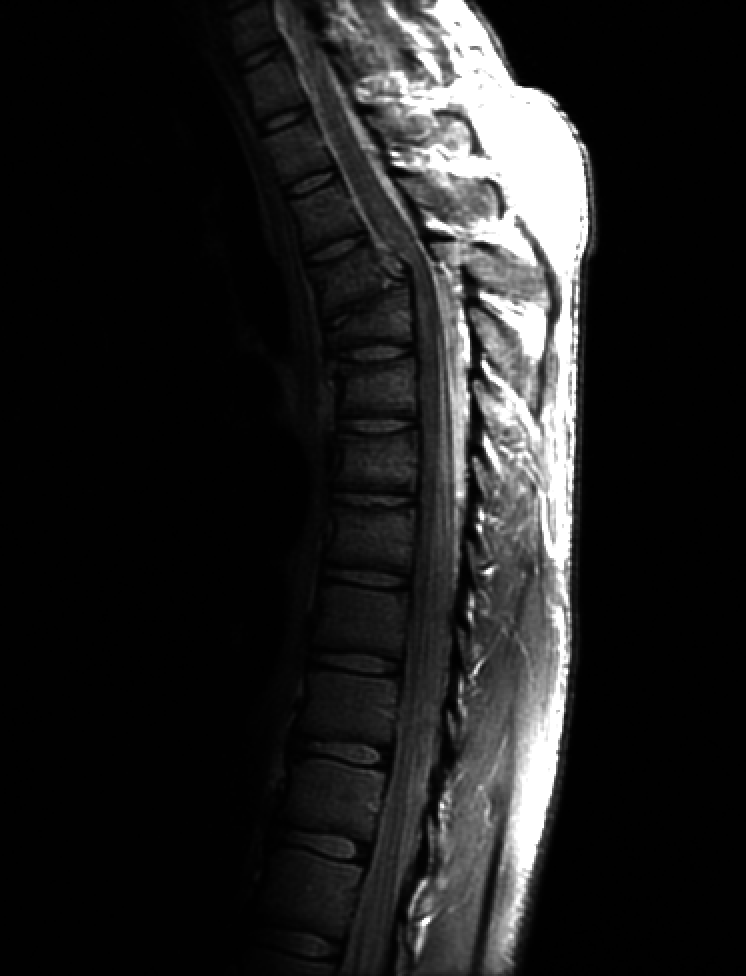

In [ ]:
fracture = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/fracture.tif')
fracture

Apply a gamma transform on `fracture`. What values of `c` and `gamma` do you think are appropriate?

In [ ]:
#insert your code here

### Aerial image

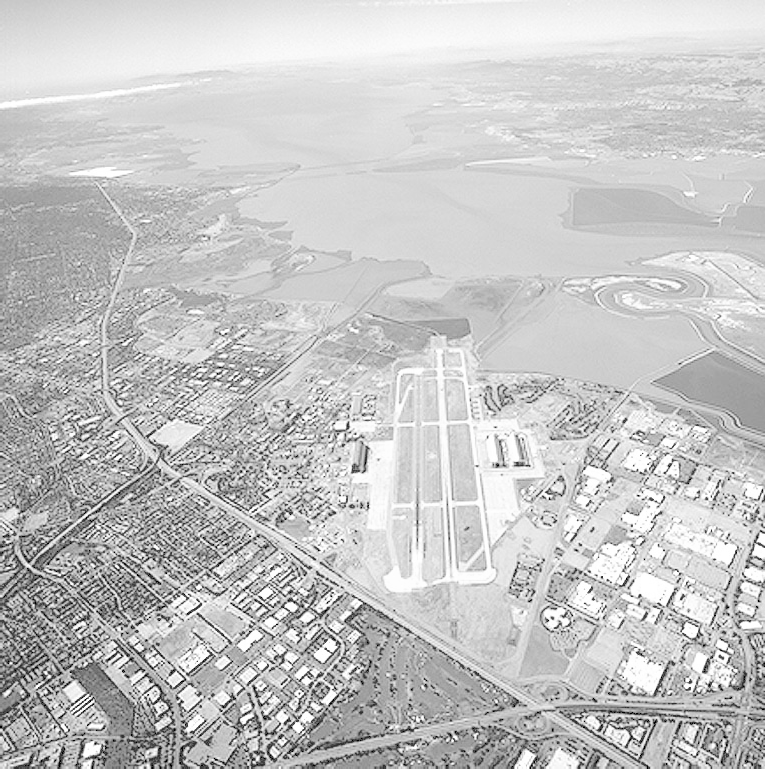

In [ ]:
aerial_image = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/aerial.tif')
aerial_image

In [ ]:
# insert your code here

## Piecewise Linear Transformation Functions

### Contrast stretching

interactive(children=(IntSlider(value=100, description='r1', max=255), IntSlider(value=0, description='s1', ma…

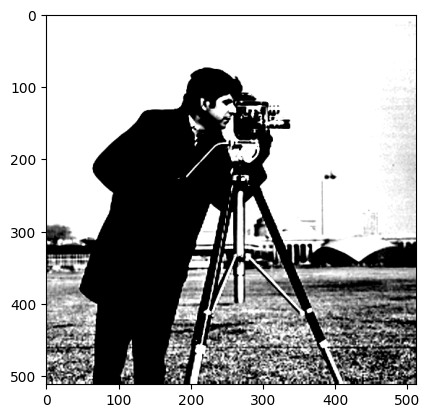

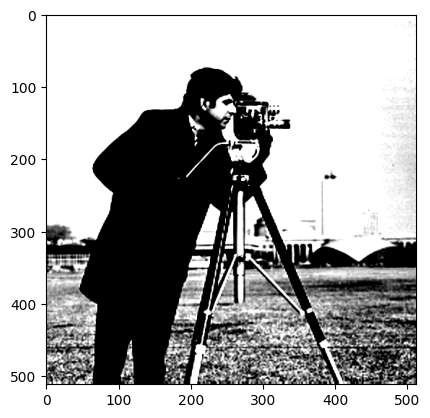

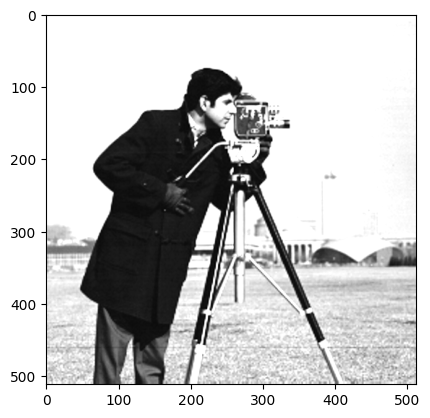

In [ ]:
# prompt: contrast stretching (c/o Colab AI)

@interact(r1=(0, 255, 1), s1=(0, 255, 1), r2=(0, 255, 1), s2=(0, 255, 1))
def contrast_stretching(r1=100, s1=0, r2=150, s2=255):
    # Initialize an empty array to store the transformed image
    transformed_image = np.zeros_like(pg_array, dtype='uint8')

    # Apply the piecewise linear transformation
    for i in range(pg_array.shape[0]):
        for j in range(pg_array.shape[1]):
            r = pg_array[i, j]
            if r < r1:
                s = (s1 / r1) * r
            elif r < r2:
                s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                s = ((255 - s2) / (255 - r2)) * (r - r2) + s2
            transformed_image[i, j] = int(s)

    plt.imshow(transformed_image, cmap='gray')


An important remark when using AI generated code is to have a sense of ownership, as it will entail accountability. Ownership no by claiming that the code is yours. Rather, in explaining how and why the code works.

From this example, we can see how the piecewise function was generated by using conditionals.

**Task:** Explain how the values of `s` are obtained for each conditional. (Hint: Refer to Figure 3.10 of Gonzales)

### Intensity-level slicing

The idea for this is a bit similar to piecewise idea in contrast stretching, but only highlights certain intensities.

Revise the generated code earlier to recreate the intensity graph in Figure 3.11(a) of Gonzales.

In [ ]:
@interact(r1=(0, 255, 1), s1=(0, 255, 1), r2=(0, 255, 1), s2=(0, 255, 1))
def contrast_stretching(r1=100, s1=0, r2=150, s2=255):
    # Initialize an empty array to store the transformed image
    transformed_image = np.zeros_like(pg_array, dtype='uint8')

    # Apply the piecewise linear transformation
    for i in range(pg_array.shape[0]):
        for j in range(pg_array.shape[1]):
            r = pg_array[i, j]
            ### INSERT CODE HERE
            transformed_image[i, j] = int(s)

    plt.imshow(transformed_image, cmap='gray')

## Exercises

### Pollen

Use contrast stretching to enhance the following image

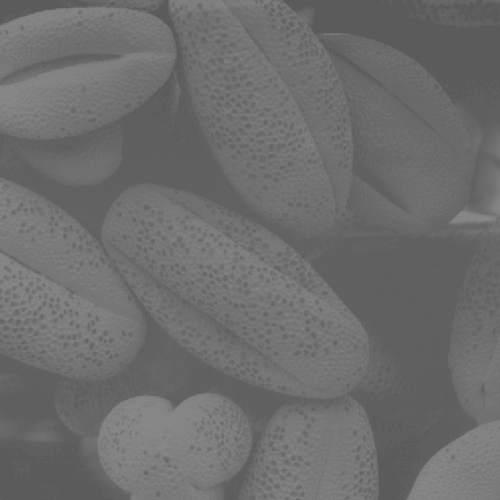

In [ ]:
pollen = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/pollen.tif')
pollen

In [ ]:
#insert your code here

### Kidney

Use intensity-level slicing to enhance the following image, highlighting the blood vessels.

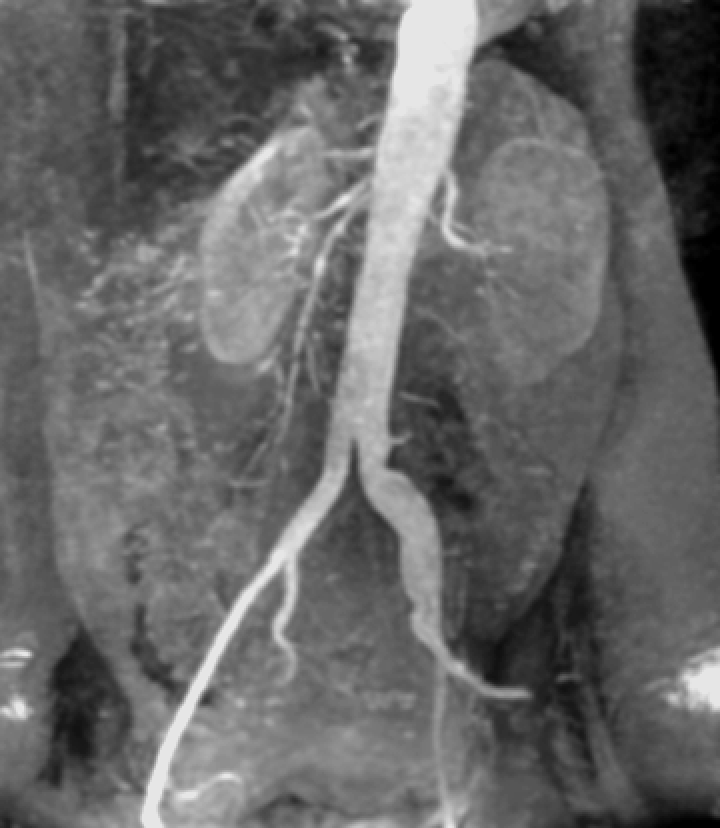

In [ ]:
kidney = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/kidney.tif')
kidney

In [ ]:
#insert code here

## Bit-plane slicing


### The bitwise and `&` and the bitwise left shift operator `<<`

Consider the 8-bit binary representation of the number 23.

In [ ]:
print(format(23,'08b'))

00010111


Let's shift the bits two positions to the left.

In [ ]:
print(format(23<<2,'08b'))

01011100


Let's get the 3rd bit from the right of 23.

In [ ]:
print(format(23 & (1<<2),'08b'))

00000100


Let's apply these two ideas in bit plane slicing.

interactive(children=(IntSlider(value=7, description='i', max=7), Output()), _dom_classes=('widget-interact',)…

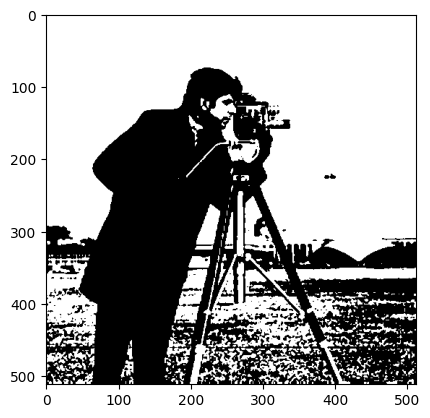

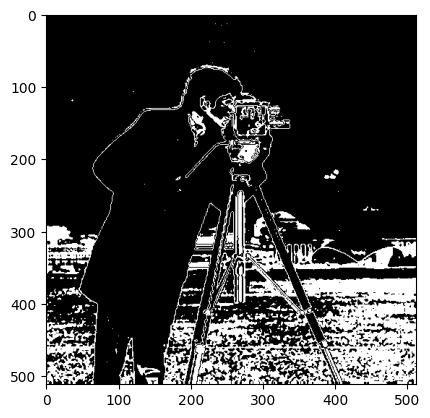

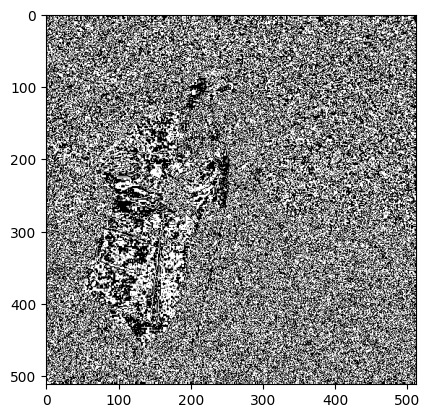

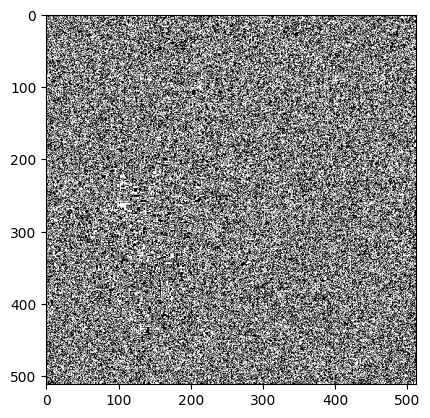

In [ ]:
@interact(i=(0,7,1))
def bitplane_slice(i=7):
    plt.imshow(pg_array & (1<<i), cmap='gray')

We can also combine multiple bit-planes to match the amount of detail we want to achieve in our image. For, instance, if we want to use the three most information-rich bit planes (bit planes 8 to 6), we do the following.

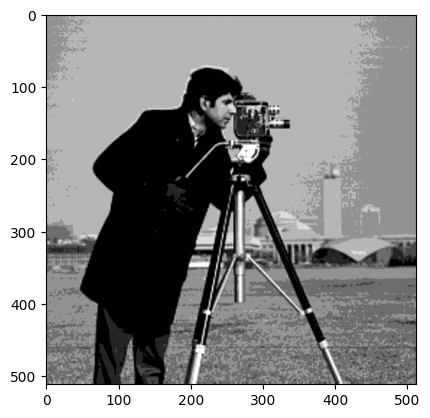

In [ ]:
plt.imshow((pg_array & (1<<7)) + (pg_array & (1<<6)) + (pg_array & (1<<5)), cmap='gray')

## Exercise

Reconstruct the following image using the following bit planes:

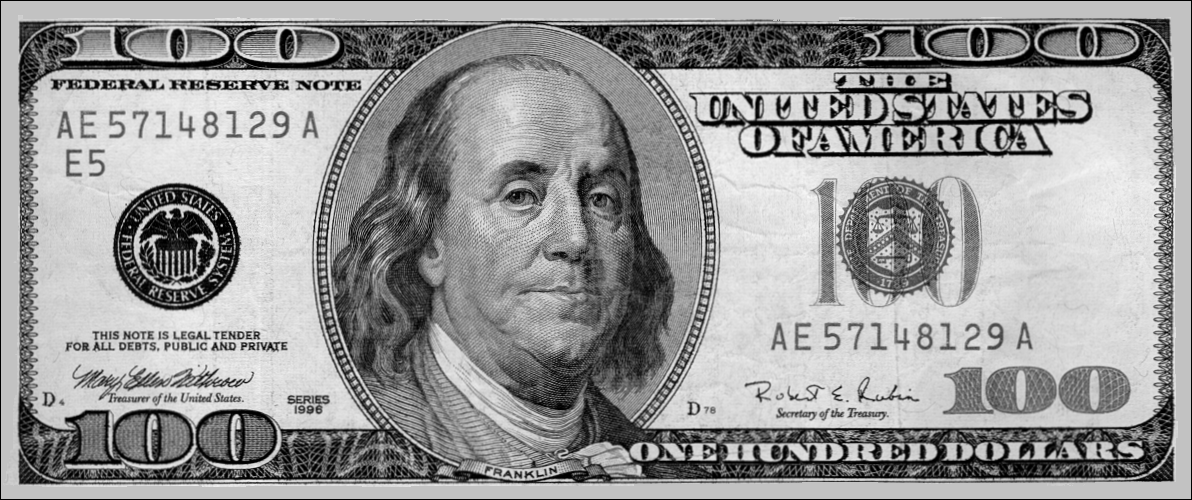

In [ ]:
dollar = Image.open('/content/drive/MyDrive/2024-2025/1 MATH 282.1/samples/dollar.tif')
dollar

Bit planes 8 and 7

In [ ]:
# insert code here

Bit planes 8, 7, and 6

In [ ]:
# insert code here

Bit planes 8, 7, 6, 5

In [ ]:
# insert code here

What are some of your observations? How could bit plane slicing help in image compression?